## 84.51 | The Complete Journey Data: Exploratory Documentation, Results and Recommendations

#### Zoe Zirlin, University of Georgia Master of Marketing Research Candidate, Class of 2021
https://www.linkedin.com/in/zoezirlin/ | https://github.com/zoezirlin

#### Table of Contents
1. Data Importation: lines 162-165
2. Categorical Variable ANOVA and Tukey Modeling: lines 166-183
3. Pivot Tables: lines 184-187
4. Indicator Variable Engineering and Correlation Visualization: lines 232-255
5. Exploratory Regression Modeling: lines 270-280
6. Basket Penetration for Varying Commodities: lines 36-99
7. Market Share for Private vs. National Brands for Each Commodity: lines 119-155

#### Bite Sized Takeaways
- There are significant differences in spending habits between those of varying income brackets at Kroger grocery stores. The spending of those in the 35-49K subcategory is significantly different than the spending of those in the 100-150K and 150K+ subcategories.


- There is no statistically significant difference in spending between those who are married, single, or unknown. It would most likely not be beneficial to segment target consumers by their marital status.


- There is a statistically significant difference between spending for homeowners and renters. Looking at the boxplot, it seems as though there is a much larger spread for homeowner spending, meaning that homeowner outliers tend to spend a lot more than renters. While it may not be feasible to segment consumers into homeowners/renters, it seems as though homeowners "bulk shop" often enough to make a sizeable difference in spending. When it comes to seasonal/ holiday promotional advertising, this may be of interest.


- We can see that there are significant differences in consumer spending between the food, non-food and pharma categories. These relationships may have been logically predicted, as pharamceuticals can become very expensive, (notice the larger spread of the accompanying boxplot,) and non-food items at Kroger stores can include costly blenders, pens or home supplies, whereas food item prices tend to be more normally distributed.


- We can see that there does not seem to be a change in patterns of spend or unit consumption among shoppers of different income ranges *across years*.


- We cannot predict units bought, or spend of a consumer, from a customer's income range, homeowner status, or loyalty flag status.


- We can see that shoppers with the loyalty flag tend to spend more money throughout all of the weeks recorded- this relationship doesn't diminish as the weeks continue on.


- The overall percent change in basket penetration for all commodities for these 5,000 shoppers, from 2016 to 2017, is 163.3%.


- The largest percent change in basket penetration from 2016 to 2017 was for the commodity FLORAL. Basket penetration increased by 352.7%.


- The second largest change in basket penetration from 2016 to 2017 was for the commodity ACTIVITY. Basket penetration increased by 306.3%.


- The third largest change in basket penetration from 2016 to 2017 was for the commodity TOBACCO. Basket penetration increased by 275.5%. This is very interesting, as tobacco sales have been dropping for the past few years. This may be an indicator that this sample of 5,000 shopper households is not entirely representative of other average Kroger consumers.


- The only commodity that saw a negative percent change in basket penetration was MEAT-POULTRY with a -2.4% change. This makes sense, as poultry products did have a slight downturn in overall market value in 2017. This is a very small change, though, in comparison to other commodities, and is most likely not representative.
https://tradingeconomics.com/commodity/poultry



- By far, these 5,000 consumer households purchased more within national brands than within private brands. However, there were 5 commodities that were more popular within private brands than national brands.
    - DAIRY represented 331,566 more purchases for private brands than national.
    - MEAT- BEEF represented 195,124 more purchases for private brands than national.
    - MEAT- CHICKEN represented 105,412 more purchases for private brands than national.
    - MEAT- PORK represented 272,187 more purchases for private brands than national.
    - MEAT- TURKEY represented 81,041 more purchases for private brands than national.

#### Further Conclusive Research Recommendations
- It is important to identify which specific attributes consumers like about Kroger private brands' meat products. Kroger can continue to create popular private brand products by learning about what they are doing *well*, not just where they see difficulties. 

    - Kroger may want to conduct quantitative survey research to suss out the importance of different meat product variables to consumers. This could be done by utilzing likert-style questions and subsequently running a TURF analysis to discover which specific product attributes account for the highest "reach", or heaviest impact on a consumer's buying decisions. I'd imagine that Kroger private meat products are already touching on the most important product messaging and attributes because of their sales records, but it's important to be able to pointedly continue use of those variables.
  
  
- As homeowners (versus renters) see a much higher spread in terms of "bulk" buying, it may interesting to conduct testing in mailed seasonal coupons. 
    - A factorial design idea: (timing = leading up to holiday) | group 1 (homeowner, coupon A) group 2 (homeowner, coupon B) group 3 (renter, coupon A) group 4 (renter, coupon B) | when coupon A = bulk buying discounts, coupon B = NO bulk buying discounts | Does bulk buying increase in groups with coupon A (group 1 and group 3), or do homeowners continue to bulk buy at a higher rate with/without mailed discounts? (group 1 and group 2)


- As basket penetration for tobacco products increased by 275% from 2016 to 2017 for these 5,00 households, it is important to ascertain if this is representative of other Kroger shoppers, because it *is* outlier behavior. In the United States, tobacco sales have been on a steady decline.
    - Do sales patterns of tobacco align with other large grocery chains? This question can most likely be answered with secondary syndicated data. It is also important to look at the differences in tobacco prices from chain to chain. If Kroger has relatively lower priced tobacco products, meaning that consumers travel there specifically to purchase tobacco, then Kroger needs to discover if tobacco users buy products of certain types at a higher rate than other consumers, and set up point-of-purchase promotions for those products.
    - The National Institute of Health published a study noting that cigarette smokers "may have greater difficulties addressing food cravings." (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5269575/)

____________________________________________________________________________________________________________________

#### Data Importation Methodology
1.	Created new Python file to host programming.
2.	Imported household, products and transactions CSV files with delimiter to automatically delete unnecessary spacing in cells, using Pandas.
3.	Merged data frames into one large table.
First merged products and transactions tables on ‘PRODUCT_NUM’ column, then merged that table with households on ‘HSHD_NUM’ column. Data frame titled ‘data’ created, with 27,269 rows and 21 columns.

#### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt #importing pyplot
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from pingouin import pairwise_tukey

#### Importing and Merging Data

In [3]:
households = pd.read_csv('/Users/zoezirlin/Desktop/84.51/5000_households.csv',delimiter=' *, *', engine='python')
products = pd.read_csv('/Users/zoezirlin/Desktop/84.51/5000_products.csv',delimiter=' *, *', engine='python')
transactions = pd.read_csv('/Users/zoezirlin/Desktop/84.51/5000_transactions_updated.csv',delimiter=' *, *', engine='python')

products[:10]
households[:10]
transactions[:10]

data_b = pd.merge(products, transactions, on='PRODUCT_NUM')       
data = pd.merge(data_b, households, on='HSHD_NUM')
data_10 = data[:10]
data[:10]

,PRODUCT_NUM,DEPARTMENT,COMMODITY,BRAND_TY,NA,BASKET_NUM,HSHD_NUM,PURCHASE_,SPEND,UNITS,...,WEEK_NUM,YEAR,L,AGE_RANGE,MARITAL,INCOME_RANGE,HOMEOWNER,HSHD_COMPOSITION,HH_SIZE,CHILDREN
0,93924,NON-FOOD,PET,PRIVATE,N,663542,4675,14-APR-17,0.78,2,...,67,2017,Y,45-54,Single,UNDER 35K,Homeowner,Single Female,1,NOT AVAILABLE
1,772215,NON-FOOD,PET,NATIONAL,N,230835,4675,12-JUN-16,0.50,1,...,24,2016,Y,45-54,Single,UNDER 35K,Homeowner,Single Female,1,NOT AVAILABLE
2,6241934,FOOD,FROZEN FOOD,NATIONAL,N,580687,4675,14-FEB-17,5.00,2,...,59,2017,Y,45-54,Single,UNDER 35K,Homeowner,Single Female,1,NOT AVAILABLE
3,782942,FOOD,IN STORE FOOD SERVICE,NATIONAL,N,61561,4675,14-FEB-16,0.99,1,...,7,2016,Y,45-54,Single,UNDER 35K,Homeowner,Single Female,1,NOT AVAILABLE
4,5651217,PHARMA,MEDICATION,NATIONAL,N,86324,4675,06-MAR-16,5.49,1,...,10,2016,Y,45-54,Single,UNDER 35K,Homeowner,Single Female,1,NOT AVAILABLE
5,145386,FOOD,FROZEN FOOD,NATIONAL,N,372903,4675,22-SEP-16,1.49,1,...,38,2016,Y,45-54,Single,UNDER 35K,Homeowner,Single Female,1,NOT AVAILABLE
6,644761,FOOD,CANNED GOODS,NATIONAL,N,583752,4675,15-FEB-17,1.00,2,...,59,2017,Y,45-54,Single,UNDER 35K,Homeowner,Single Female,1,NOT AVAILABLE
7,1082439,NON-FOOD,PET,NATIONAL,N,801871,4675,18-JUL-17,2.49,1,...,81,2017,Y,45-54,Single,UNDER 35K,Homeowner,Single Female,1,NOT AVAILABLE
8,2496183,FOOD,DAIRY,NATIONAL,Y,652660,4675,06-APR-17,2.49,1,...,66,2017,Y,45-54,Single,UNDER 35K,Homeowner,Single Female,1,NOT AVAILABLE
9,2213869,FOOD,FROZEN FOOD,NATIONAL,N,997493,4675,05-DEC-17,6.49,1,...,101,2017,Y,45-54,Single,UNDER 35K,Homeowner,Single Female,1,NOT AVAILABLE


#### Creating Value Counts and Descriptive Statistics for both Categorical and Continuous Variables

In [4]:
department = data['DEPARTMENT'].value_counts(ascending=False)
commodity = data['COMMODITY'].value_counts(ascending=False)
brand = data['BRAND_TY'].value_counts(ascending=False)
store = data['STORE_R'].value_counts(ascending=False)
year = data['YEAR'].value_counts(ascending=False)
loyalty_flag = data['L'].value_counts(ascending=False)
age_range = data['AGE_RANGE'].value_counts(ascending=False)
marital_status = data['MARITAL'].value_counts(ascending=False)
income_range = data['INCOME_RANGE'].value_counts(ascending=False)
homeowner = data['HOMEOWNER'].value_counts(ascending=False)
hshd_comp = data['HSHD_COMPOSITION'].value_counts(ascending=False)
hh_size = data['HH_SIZE'].value_counts(ascending=False)
children = data['CHILDREN'].value_counts(ascending=False)

data_descriptives = data.describe()
corr_table = data.corr(method='pearson')

In [5]:
data_descriptives[:30]

,PRODUCT_NUM,BASKET_NUM,HSHD_NUM,SPEND,UNITS,WEEK_NUM,YEAR
count,2.726900e+04,27269.000000,27269.000000,27269.000000,27269.000000,27269.000000,27269.000000
mean,2.338646e+06,482377.352782,2520.816385,3.653794,1.313910,52.297554,2016.493344
std,2.392453e+06,290424.601817,1410.602605,3.818546,1.113201,29.791134,0.499965
min,2.632000e+03,24.000000,1.000000,-14.990000,-2.000000,1.000000,2016.000000
25%,1.042190e+05,222125.000000,1302.000000,1.700000,1.000000,27.000000,2016.000000
50%,9.786560e+05,477824.000000,2516.000000,2.640000,1.000000,52.000000,2016.000000
75%,5.042460e+06,737656.000000,3738.000000,4.140000,1.000000,78.000000,2017.000000
max,6.782150e+06,999958.000000,4999.000000,81.980000,60.000000,104.000000,2017.000000


____________________________________________________________________________________________________________________

#### Differentiation of Categorical Variables Regarding Consumer Spend Methodology:
1. First, we analyze a boxplot to visualize the shape of the categorical variables and outliers against spend. This is segmented by year, to see the general differences in shape from 2016 to 2017.
2. Second, we run an ANOVA table to see if the differences between categorical variables categories are significant, which will help us to see if these are strong predictor variables of shopper behavior. This can tell us many things about promotional needs regarding varying product traits. For example, did large families spend significantly more money at Kroger stores in 2016 and 2017? Should target market clustering for promotional marketing be segmented by family size, or is that an unnecessary differentiation to make?
3. Third, we run a Tukey test to zoom in and analyze specific pairwise differences between groups within the categorical variable. For example, the difference in average spend between age groups 19-24 and 25-34 may be insignificant, but the difference between groups 19-24 and 45-55 may be significant. That being true, Kroger may want to consider allocating more funds to target the age groups spending more money at their stores. Or, Kroger may want to consider putting funds into targeting age groups spending less to better the brand-consumer relationship. (Albeit, young people may just spend less money at grocery stores regardless of the store. More research needs to be conducted to asses this relationship.)

##### Relationship Between Spend and Department: Does spending vary by product department purchased by consumer?

#### Spend and Department Boxplot

Text(0.5, 1.0, 'BOXPLOT FOR DEPARTMENT BY SPEND | SEGMENTED BY YEAR')

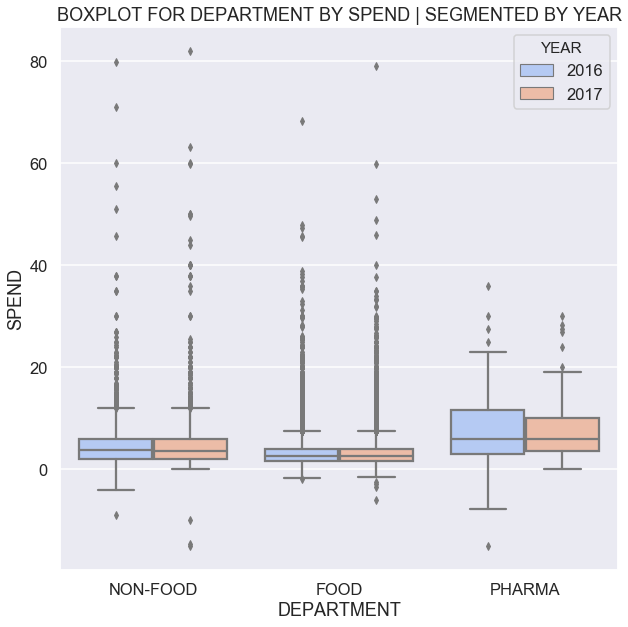

In [141]:
plt.figure(figsize=(10,10))
sns.set()
sns.set_context("talk")
axs1 = sns.boxplot(x = 'DEPARTMENT',
                  y = 'SPEND',
                  data=data,
                  hue = 'YEAR',
                  palette = 'coolwarm')
axs1.set_title('BOXPLOT FOR DEPARTMENT BY SPEND | SEGMENTED BY YEAR')

#### Spend and Department ANOVA Modeling

In [7]:
anova1 = data.loc[:,['SPEND','DEPARTMENT']]

model1 = ols('SPEND ~ DEPARTMENT', data=anova1).fit()

aov_table1 = sm.stats.anova_lm(model1, typ=2)
aov_table1 = pd.DataFrame(data=aov_table1)

aov_table1[:30]

,sum_sq,df,F,PR(>F)
DEPARTMENT,13123.939351,2.0,465.35371,1.871549e-199
Residual,384478.862692,27266.0,NaN,NaN


#### Spend and Department Tukey Modeling

In [8]:
tukey1 = pairwise_tukey(data=anova1, dv='SPEND', between='DEPARTMENT')
tukey1 = pd.DataFrame(data=tukey1)
tukey1[:30]

,A,B,mean(A),mean(B),diff,se,tail,T,p-tukey,hedges
0,FOOD,NON-FOOD,3.396213,5.075636,-1.679423,0.068001,two-sided,-24.697111,0.001,-0.447221
1,FOOD,PHARMA,3.396213,7.829144,-4.432931,0.235516,two-sided,-18.822223,0.001,-1.180461
2,NON-FOOD,PHARMA,5.075636,7.829144,-2.753508,0.242677,two-sided,-11.346390,0.001,-0.733118


#### Spend and Department Hypothesis Summary

- Ho: μ1(food) = μ2(non-food) = μ3(pharma)
- Ha: μ =/ μ for at least one relationship
- Result: We reject the null hypothesis in favor of the alternative, significantly differing spends between departments

#### What does this tell us about spending on different Kroger departments?
- We can see that there are significant differences in consumer spending between the food, non-food and pharma categories. 
- These relationships may have been logically predicted, as pharamceuticals can become very expensive, (notice the larger spread of the accompanying boxplot above,) and non-food items at Kroger stores can include costly blenders, pens or home supplies, whereas food items tend to be more normally distributed.

##### Relationship Between Spend and Marital Status: Does spending vary by marital status of consumer?

#### Spend and Marital Status Boxplot

Text(0.5, 1.0, 'BOXPLOT FOR MARITAL STATUS BY SPEND | SEGMENTED BY YEAR')

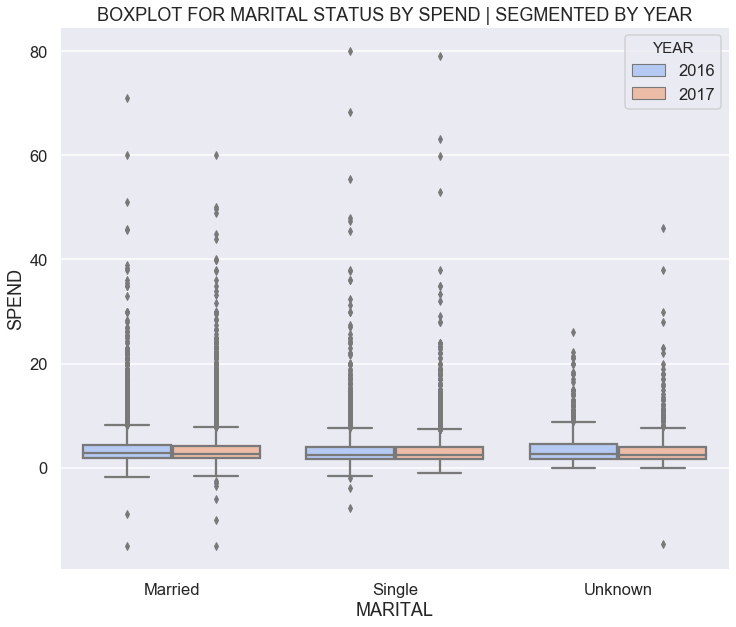

In [9]:
plt.figure(figsize=(12,10))
sns.set()
sns.set_context("talk")
axs2 = sns.boxplot(x = 'MARITAL',
                  y = 'SPEND',
                  data=data,
                  hue = 'YEAR',
                  palette = 'coolwarm',
                  order = ['Married','Single','Unknown'])
axs2.set_title('BOXPLOT FOR MARITAL STATUS BY SPEND | SEGMENTED BY YEAR')

#### Spend and Marital Status ANOVA Modeling

In [10]:
anova2 = data.loc[:,['SPEND','MARITAL']]
anova2 = anova2.dropna()

model2 = ols('SPEND ~ MARITAL', data=anova2).fit()

aov_table2 = sm.stats.anova_lm(model2, typ=2)
aov_table2 = pd.DataFrame(data=aov_table2)

aov_table2[:30]

,sum_sq,df,F,PR(>F)
MARITAL,69.856828,2.0,2.366003,0.093878
Residual,334329.145675,22647.0,NaN,NaN


#### Spend and Marital Status Tukey Modeling

In [11]:
tukey2 = pairwise_tukey(data=anova2, dv='SPEND', between = 'MARITAL')
tukey2 = pd.DataFrame(data=tukey2)
tukey2[:30]

,A,B,mean(A),mean(B),diff,se,tail,T,p-tukey,hedges
0,Married,Single,3.718476,3.602865,0.115611,0.055225,two-sided,2.093444,0.091141,0.030089
1,Married,Unknown,3.718476,3.619324,0.099151,0.098889,two-sided,1.002653,0.681943,0.025804
2,Single,Unknown,3.602865,3.619324,-0.016459,0.103045,two-sided,-0.159731,0.900000,-0.004284


#### Spend and Marital Status Hypothesis Summary
- Ho: μ1(single) = μ2(single) = μ3(unknown)
- Ha: μ =/ μ
- Result: Fail to reject null hypothesis
- Not significantly different spends between marital types

#### What does this tell us about spending by those of different marital status?
- There is no statistically significant difference in spending between those who are married, single, or unknown. It would most likely not be beneficial to segment target consumers by their marital status.

##### Relationship between Spend and Homeowner Status: Does spending vary by homeowner status of consumer?

#### Spend and Homeowner Status Boxplot

Text(0.5, 1.0, 'BOXPLOT FOR HOMEOWNER STATUS BY SPEND | SEGMENTED BY YEAR')

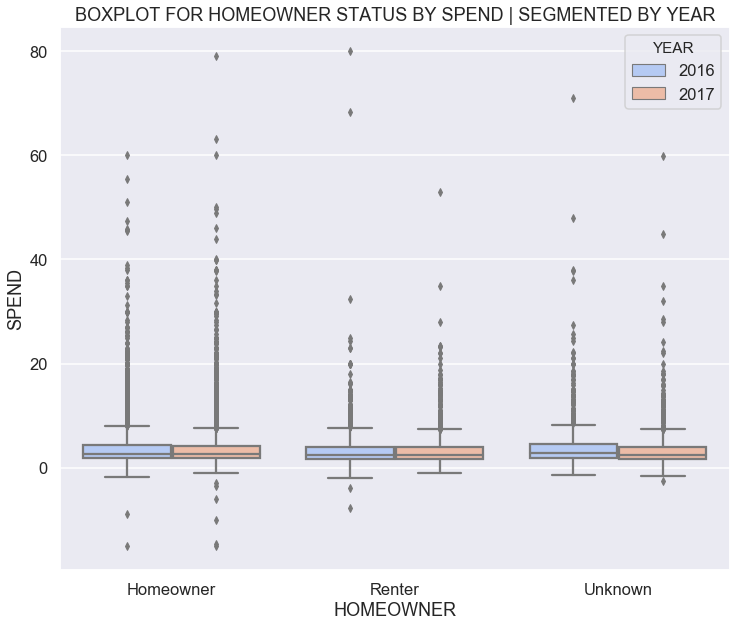

In [12]:
plt.figure(figsize=(12, 10))
sns.set()
sns.set_context("talk")
axs3 = sns.boxplot(x = 'HOMEOWNER',
                  y = 'SPEND',
                  data=data,
                  hue = 'YEAR',
                  palette = 'coolwarm',
                  order = ['Homeowner','Renter','Unknown'])
axs3.set_title('BOXPLOT FOR HOMEOWNER STATUS BY SPEND | SEGMENTED BY YEAR')

#### Spend and Homeowner Status ANOVA Modeling

In [13]:
anova3 = data.loc[:,['SPEND','HOMEOWNER']]
anova3 = anova3.dropna()

model3 = ols('SPEND ~ HOMEOWNER', data=anova3).fit()

aov_table3 = sm.stats.anova_lm(model3, typ=2)
aov_table3 = pd.DataFrame(data=aov_table3)

aov_table3[:30]

,sum_sq,df,F,PR(>F)
HOMEOWNER,156.005299,2.0,5.292743,0.005034
Residual,335797.582866,22785.0,NaN,NaN


#### Spend and Homeowner Status Tukey Modeling

In [14]:
tukey3 = pairwise_tukey(data=anova3, dv='SPEND', between = 'HOMEOWNER')
tukey3 = pd.DataFrame(data=tukey3)
tukey3[:30]

,A,B,mean(A),mean(B),diff,se,tail,T,p-tukey,hedges
0,Homeowner,Renter,3.680945,3.493954,0.186991,0.075602,two-sided,2.473379,0.035713,0.048707
1,Homeowner,Unknown,3.680945,3.831997,-0.151051,0.085253,two-sided,-1.771800,0.179240,-0.039345
2,Renter,Unknown,3.493954,3.831997,-0.338043,0.106284,two-sided,-3.180547,0.004199,-0.088043


#### Spend and Homeowner Status Hypothesis Summary

- Ho: μ1(homeowner) = μ2(single) = μ3(unknown)
- Ha: μ =/ μ
- Reject the null hypothesis for the pairwise relationship between homeowner and renter

#### What does this tell us about spending by those of different homeowner status?

- There is a statistically significant difference between spending for homeowners and renters. Looking at the boxplot, it seems as though there is a much larger spread for homeowner spending, meaning that homeowner outliers tend to spend a lot more than renters. While it may not be feasible to segment consumers into homeowners/renters, it seems as though homeowners "bulk shop" often enough to make a sizeable difference in spending. When it comes to seasonal/ holiday promotional advertising, this may be of interest.

##### Relationship between Spend and Household Size: Does spending vary by household size of consumer?

#### Spend and Household Size Boxplot

Text(0.5, 1.0, 'BOXPLOT FOR HOUSEHOLD SIZE BY SPEND | SEGMENTED BY YEAR')

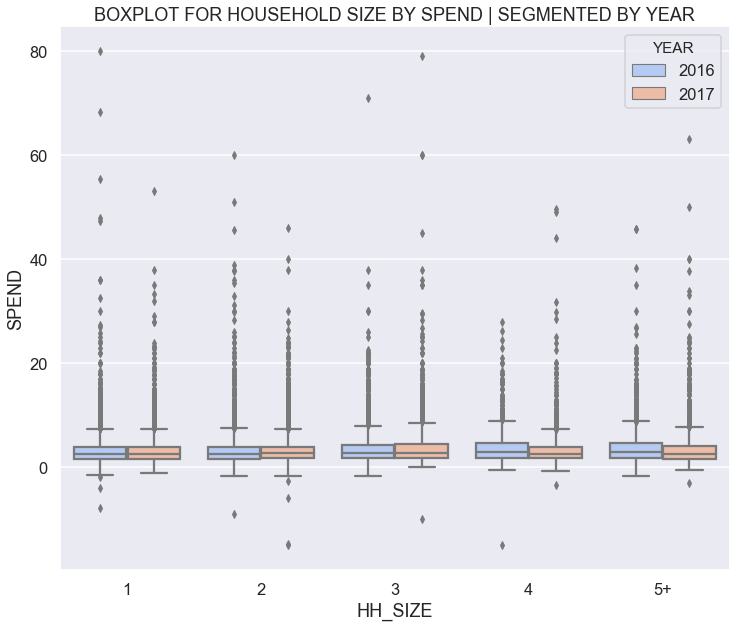

In [15]:
plt.figure(figsize=(12, 10))
sns.set()
sns.set_context("talk")
axs4 = sns.boxplot(x = 'HH_SIZE',
                  y = 'SPEND',
                  data=data,
                  hue = 'YEAR',
                  palette = 'coolwarm',
                  order = ['1','2','3','4','5+'])
axs4.set_title('BOXPLOT FOR HOUSEHOLD SIZE BY SPEND | SEGMENTED BY YEAR')

#### Spend and Household Size Status ANOVA Modeling

In [16]:
anova4= data.loc[:,['SPEND','HH_SIZE']]
anova4 = anova4.dropna()

model4 = ols('SPEND ~ HH_SIZE', data=anova4).fit()

aov_table4 = sm.stats.anova_lm(model4, typ=2)
aov_table4 = pd.DataFrame(data=aov_table4)
aov_table4[:30]

,sum_sq,df,F,PR(>F)
HH_SIZE,381.478579,4.0,6.458889,0.000034
Residual,331281.947386,22436.0,NaN,NaN


#### Spend and Household Size Status Tukey Modeling

In [17]:
tukey4 = pairwise_tukey(data=anova4, dv='SPEND', between = 'HH_SIZE')
tukey4 = pd.DataFrame(data=tukey4)
tukey4[:30]

,A,B,mean(A),mean(B),diff,se,tail,T,p-tukey,hedges
0,1,2,3.560571,3.571072,-0.010501,0.069603,two-sided,-0.150864,0.900000,-0.002733
1,1,3,3.560571,3.760843,-0.200272,0.077015,two-sided,-2.600424,0.070409,-0.052115
2,1,4,3.560571,3.734424,-0.173853,0.098714,two-sided,-1.761185,0.548696,-0.045239
3,1,5+,3.560571,3.924176,-0.363605,0.087015,two-sided,-4.178644,0.001000,-0.094616
4,2,3,3.571072,3.760843,-0.189771,0.071911,two-sided,-2.638962,0.063624,-0.049383
5,2,4,3.571072,3.734424,-0.163352,0.094785,two-sided,-1.723389,0.535411,-0.042507
6,2,5+,3.571072,3.924176,-0.353104,0.082532,two-sided,-4.278392,0.001000,-0.091885
7,3,4,3.760843,3.734424,0.026419,0.100354,two-sided,0.263261,0.900000,0.006875
8,3,5+,3.760843,3.924176,-0.163333,0.088872,two-sided,-1.837844,0.352101,-0.042502
9,4,5+,3.734424,3.924176,-0.189752,0.108219,two-sided,-1.753416,0.545798,-0.049374


#### Spend and Household Size Status Hypothesis Summary

- Ho: μ1(1) = μ2(2) = μ3(3) = μ4(4) = μ5(5+)
- Ha: μ =/ μ
- Result: Reject the null hypothesis in favor of the alternative

#### What does this tell us about spending by those of different household size?

- Although we technically rejected the null hypothesis in favor of the alternative, the only significant difference between groups is that of two ppl in a household and 5+ ppl in a household. This is actually surprising in that one would think families of 5+ buy significantly more than most other households, not just households of 2.

##### Relationship between Spend and Age Range: Does spending vary by age range of consumer?

Text(0.5, 1.0, 'BOXPLOT FOR AGE RANGE SIZE BY SPEND | SEGMENTED BY YEAR')

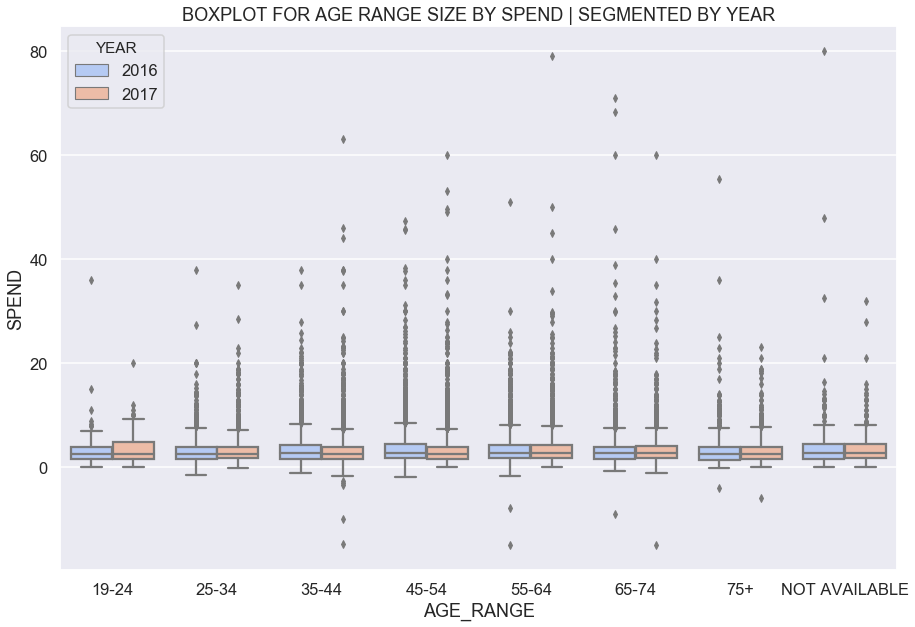

In [18]:
plt.figure(figsize=(15, 10))
sns.set()
sns.set_context("talk")
axs5 = sns.boxplot(x = 'AGE_RANGE',
                  y = 'SPEND',
                  data=data,
                  hue = 'YEAR',
                  palette = 'coolwarm',
                  order = ['19-24','25-34','35-44','45-54','55-64','65-74','75+','NOT AVAILABLE'])
axs5.set_title('BOXPLOT FOR AGE RANGE SIZE BY SPEND | SEGMENTED BY YEAR')

#### Spend and Age Range Status ANOVA Modeling

In [19]:
anova5 = data.loc[:,['SPEND','AGE_RANGE']]
anova5 = anova5.dropna()

model5 = ols('SPEND ~ AGE_RANGE', data=anova5).fit()

aov_table5 = sm.stats.anova_lm(model5, typ=2)
aov_table5 = pd.DataFrame(data=aov_table5)
aov_table5[:30]

,sum_sq,df,F,PR(>F)
AGE_RANGE,222.930622,7.0,2.160899,0.034456
Residual,335730.657543,22780.0,NaN,NaN


#### Spend and Age Range Status Tukey Modeling

In [20]:
tukey5 = pairwise_tukey(data=anova5, dv='SPEND', between = 'AGE_RANGE')
tukey5 = pd.DataFrame(data=tukey5)
tukey5[:10]

,A,B,mean(A),mean(B),diff,se,tail,T,p-tukey,hedges
0,19-24,25-34,3.646780,3.533825,0.112954,0.303149,two-sided,0.372603,0.900000,0.029411
1,19-24,35-44,3.646780,3.661807,-0.015027,0.294542,two-sided,-0.051019,0.900000,-0.003914
2,19-24,45-54,3.646780,3.741126,-0.094346,0.292454,two-sided,-0.322602,0.900000,-0.024573
3,19-24,55-64,3.646780,3.674605,-0.027825,0.293449,two-sided,-0.094822,0.900000,-0.007247
4,19-24,65-74,3.646780,3.732496,-0.085717,0.297640,two-sided,-0.287988,0.900000,-0.022322
5,19-24,75+,3.646780,3.368870,0.277910,0.305161,two-sided,0.910699,0.900000,0.072359
6,19-24,NOT AVAILABLE,3.646780,3.795464,-0.148685,0.321557,two-sided,-0.462390,0.900000,-0.038698
7,25-34,35-44,3.533825,3.661807,-0.127981,0.110108,two-sided,-1.162326,0.900000,-0.033333
8,25-34,45-54,3.533825,3.741126,-0.207301,0.104394,two-sided,-1.985756,0.491861,-0.053994
9,25-34,55-64,3.533825,3.674605,-0.140780,0.107148,two-sided,-1.313882,0.499996,-0.036667


#### Spend and Age Range Status Hypothesis Summary
- Ho: μ1(19-24) = μ2(25-34) = μ3(35-44) = μ4(45-54) = μ5(55-64 = μ6(65-74) = μ7(75+)
- Ha: μ =/ μ
- Result: Fail to reject the null hypothesis in favor of the alternative

#### What does this tell us about spending by those of different age ranges?
- While the ANOVA model told us that there was at least one significant relationship, after further Tukey testing, there seems to be no significance. Therefore, we can conclude that segmenting consumers by age range may not be an applicable method of consumer differentiation in terms of spending power.

##### Relationship between Spend and Income Bracket: Does spending vary by income bracket of consumer?

Text(0.5, 1.0, 'BOXPLOT FOR INCOME BRACKET BY SPEND | SEGMENTED BY YEAR')

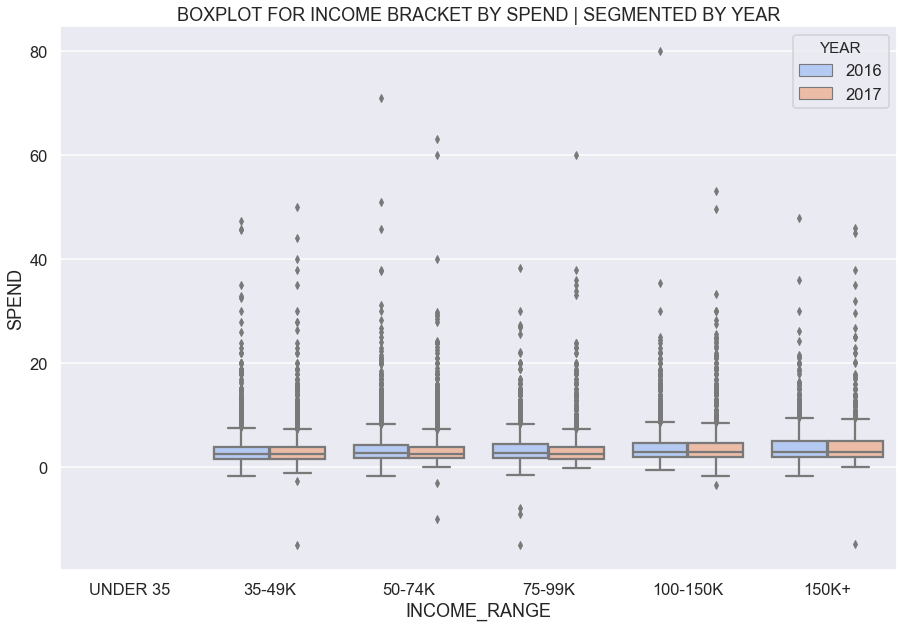

In [21]:
plt.figure(figsize=(15, 10))
sns.set()
sns.set_context("talk")
axs6 = sns.boxplot(x = 'INCOME_RANGE',
                  y = 'SPEND',
                  data=data,
                  hue = 'YEAR',
                  palette = 'coolwarm',
                  order = ['UNDER 35','35-49K','50-74K','75-99K','100-150K','150K+'])
axs6.set_title('BOXPLOT FOR INCOME BRACKET BY SPEND | SEGMENTED BY YEAR')

#### Spend and Income Bracket Status ANOVA Modeling

In [22]:
anova6 = data.loc[:,['SPEND','INCOME_RANGE']]
anova6 = anova6.dropna()

model6 = ols('SPEND ~ INCOME_RANGE', data=anova6).fit()

aov_table6 = sm.stats.anova_lm(model6, typ=2)
aov_table6 = pd.DataFrame(data=aov_table6)
aov_table6[:30]

,sum_sq,df,F,PR(>F)
INCOME_RANGE,1080.049305,5.0,14.695508,2.041086e-14
Residual,334873.538860,22782.0,NaN,NaN


#### Spend and Income Bracket Status Tukey Modeling

In [23]:
tukey6 = pairwise_tukey(data=anova6, dv='SPEND', between = 'INCOME_RANGE')
tukey6 = pd.DataFrame(data=tukey6)
tukey6[:10]

,A,B,mean(A),mean(B),diff,se,tail,T,p-tukey,hedges
0,100-150K,150K+,3.968805,4.173198,-0.204392,0.112104,two-sided,-1.823233,0.452436,-0.053304
1,100-150K,35-49K,3.968805,3.505021,0.463784,0.086482,two-sided,5.362752,0.001000,0.120957
2,100-150K,50-74K,3.968805,3.662299,0.306507,0.085170,two-sided,3.598749,0.648638,0.079939
3,100-150K,75-99K,3.968805,3.635230,0.333576,0.095625,two-sided,3.488389,0.648638,0.086996
4,100-150K,UNDER 35K,3.968805,3.460275,0.508531,0.088948,two-sided,5.717162,0.001000,0.132626
5,150K+,35-49K,4.173198,3.505021,0.668176,0.105188,two-sided,6.352184,0.001000,0.174260
6,150K+,50-74K,4.173198,3.662299,0.510899,0.104112,two-sided,4.907190,0.001000,0.133243
7,150K+,75-99K,4.173198,3.635230,0.537968,0.112825,two-sided,4.768169,0.001000,0.140296
8,150K+,UNDER 35K,4.173198,3.460275,0.712923,0.107225,two-sided,6.648863,0.001000,0.185928
9,35-49K,50-74K,3.505021,3.662299,-0.157278,0.075837,two-sided,-2.073899,0.717367,-0.041019


#### Spend and Income Bracket Status Hypothesis Summary
- Ho: μ1(35-49K) = μ2(50-74K) = μ3(75-99K) = μ4(100-150K) = μ5(150K+)
- Ha: μ =/ μ
- Result: Reject the null hypothesis in favor of the alternative

#### What does this tell us about spending by those of different income brackets?
- There are significant differences in spending habits between those of differing income brackets at Kroger grocery stores. The spending of those in the 35-49K subcategory is significantly different than the spending of those in the 100-150K and 150K+ subcategories.

____________________________________________________________________________________________________________________

#### Which demographic variable combinations spend the most? 
Significant Categorical Variables to Analyze
1. Homeowner status
2. Household size
3. Income bracket

#### Pivot Table for Spend
- Indexed by homeowner status and income range

In [24]:
pv1 = data.pivot_table('SPEND',index = ['HOMEOWNER','INCOME_RANGE'],aggfunc= 'sum')
pv1[:30]

SPEND
HOMEOWNER INCOME_RANGE          
Homeowner 100-150K      10206.04
          150K+          6199.87
          35-49K        12853.48
          50-74K        14677.86
          75-99K         8760.24
          UNDER 35K     11604.94
Renter    100-150K        882.59
          150K+           367.69
          35-49K         3080.11
          50-74K         2269.95
          75-99K         1340.92
          UNDER 35K      2627.95
Unknown   100-150K       1901.27
          150K+          1027.66
          35-49K         1307.61
          50-74K         2535.62
          75-99K         1382.53
          UNDER 35K       635.91

Text(0.5, 1.0, 'SPEND INDEXED BY INCOME RANGE AND HOMEOWNER STATUS')

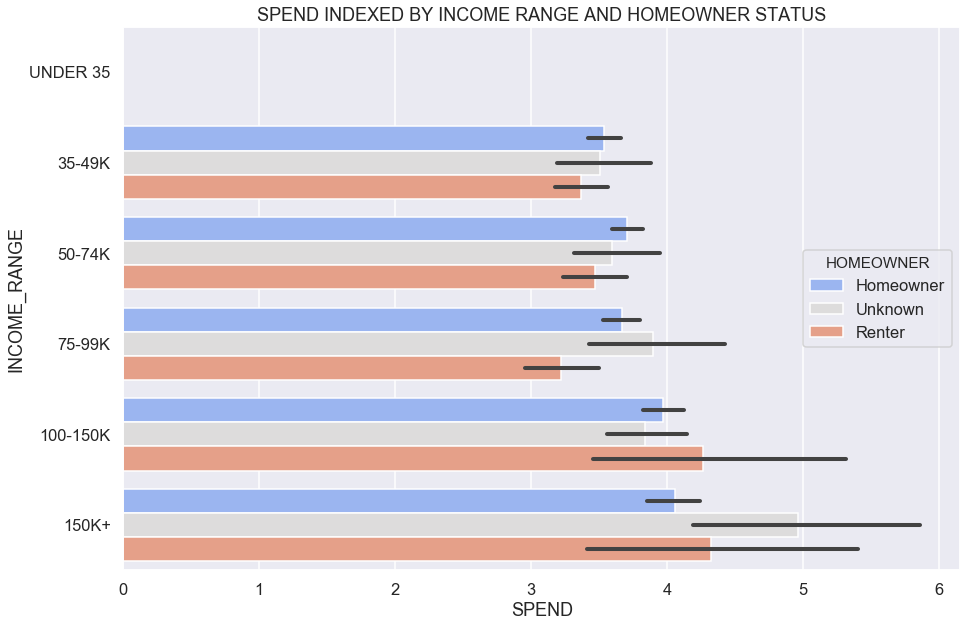

In [25]:
plt.figure(figsize=(15, 10))
sns.set()
sns.set_context("talk")
axs7 = sns.barplot(data=data,
                  hue='HOMEOWNER',
                  x='SPEND',
                  y='INCOME_RANGE',
                  order = ['UNDER 35','35-49K','50-74K','75-99K','100-150K','150K+'],
                  palette = 'coolwarm')
axs7.set_title('SPEND INDEXED BY INCOME RANGE AND HOMEOWNER STATUS')

#### Pivot Table for Spend
- Indexed by homeowner status and household size

In [26]:
pv2 = data.pivot_table('SPEND',index = ['HOMEOWNER','HH_SIZE'], aggfunc= 'count')
pv2[:30]

SPEND
HOMEOWNER HH_SIZE       
Homeowner 1         3108
          2         5865
          3         3966
          4         1643
          5+        2646
Renter    1         1405
          2          782
          3          403
          4          170
          5+         219
Unknown   1          756
          2          583
          3          350
          4          314
          5+         231

Text(0.5, 1.0, 'SPEND INDEXED BY INCOME RANGE AND HOUSEHOLD S')

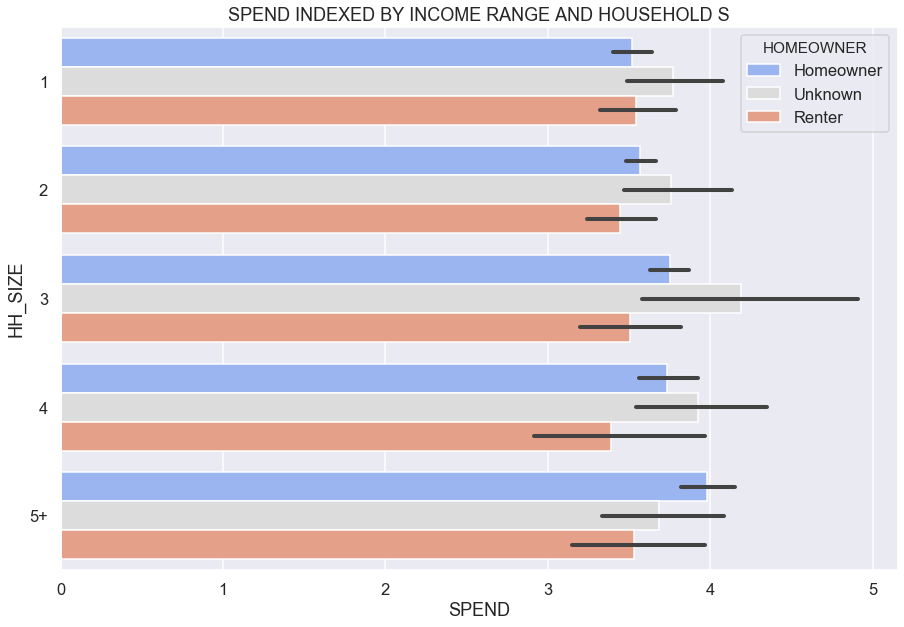

In [27]:
plt.figure(figsize=(15, 10))
sns.set()
sns.set_context("talk")
axs7 = sns.barplot(data=data,
                  hue='HOMEOWNER',
                  x='SPEND',
                  y='HH_SIZE',
                  palette = 'coolwarm',
                  order = ['1','2','3','4','5+'])
axs7.set_title('SPEND INDEXED BY INCOME RANGE AND HOUSEHOLD S')

____________________________________________________________________________________________________________________

#### Featuring Engineering: Indicator Variables for the Categorical Data
- Created a new copy of the data dataframe to manipulate the values of the categorical variables.
- Used pandas mapping to assign new indicator variable names.
- Removed observations with NA data values from this set.
- Now able to work with the categorical variables in new ways!

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html

In [28]:
data_f = data.copy()
data_f = data_f.dropna()

# department
data_f['DEPARTMENT'] = data_f.DEPARTMENT.map({'FOOD':1,
                                              'NON-FOOD':2,
                                              'PHARMA':3
                                              })

# store geographic area
data_f['STORE_R'] = data_f.STORE_R.map({'EAST':1,
                                       'WEST':2,
                                       'CENTRAL':3,
                                       'SOUTH':4
                                       })

# loyalty flag
data_f['L'] = data_f.L.map({'Y':1,
                            'N':0
                            })

# age_range
data_f['AGE_RANGE'] = data_f.AGE_RANGE.map({'19-24':1,
                                            '25-34':2,
                                            '35-44':3,
                                            '45-54':4,
                                            '55-64':5,
                                            '65-74':6,
                                            '75+':7,
                                            'NOT AVAILABLE':8
                                            })

# marital status
data_f['MARITAL'] = data_f.MARITAL.map({'Single':1,
                                        'Married':2,
                                        'Unknown':3
                                        })

# homeowner
data_f['HOMEOWNER'] = data_f.HOMEOWNER.map({'Homeowner':1,
                                            'Renter':2,
                                            'Unknown':3
                                            })

# household composition
data_f['HSHD_COMPOSITION'] = data_f.HSHD_COMPOSITION.map({'Single Female':1,
                                                          'Single Male':2,
                                                          '1 Adult':3,
                                                          '1 Adult and Kids':4,
                                                          '2 Adults':5,
                                                          '2 Adults and Kids':6
                                                          })

# household size
data_f['HH_SIZE'] = data_f.HH_SIZE.map({'1':1,
                                        '2':2,
                                        '3':3,
                                        '4':4,
                                        '5+':5
                                        })

# children
data_f['CHILDREN'] = data_f.CHILDREN.map({'1':1,
                                          '2':2,
                                          '3+':3,
                                          'NOT AVAILABLE':4
                                          })

#income range
data_f['INCOME_RANGE'] = data_f.INCOME_RANGE.map({'UNDER 35K':1,
                                                  '35-49K':2,
                                                  '50-74K':3,
                                                  '75-99K':4,
                                                  '100-150K':5,
                                                  '150K+':6
                                                  })

data_f['YEAR'] = data_f.YEAR.map({2016:1,
                                 2017:2})

data_f_10 = data_f[:10]
data_f_10[:10]

,PRODUCT_NUM,DEPARTMENT,COMMODITY,BRAND_TY,NA,BASKET_NUM,HSHD_NUM,PURCHASE_,SPEND,UNITS,...,WEEK_NUM,YEAR,L,AGE_RANGE,MARITAL,INCOME_RANGE,HOMEOWNER,HSHD_COMPOSITION,HH_SIZE,CHILDREN
0,93924,2,PET,PRIVATE,N,663542,4675,14-APR-17,0.78,2,...,67,2,1,4,1,1,1,1,1,4
1,772215,2,PET,NATIONAL,N,230835,4675,12-JUN-16,0.50,1,...,24,1,1,4,1,1,1,1,1,4
2,6241934,1,FROZEN FOOD,NATIONAL,N,580687,4675,14-FEB-17,5.00,2,...,59,2,1,4,1,1,1,1,1,4
3,782942,1,IN STORE FOOD SERVICE,NATIONAL,N,61561,4675,14-FEB-16,0.99,1,...,7,1,1,4,1,1,1,1,1,4
4,5651217,3,MEDICATION,NATIONAL,N,86324,4675,06-MAR-16,5.49,1,...,10,1,1,4,1,1,1,1,1,4
5,145386,1,FROZEN FOOD,NATIONAL,N,372903,4675,22-SEP-16,1.49,1,...,38,1,1,4,1,1,1,1,1,4
6,644761,1,CANNED GOODS,NATIONAL,N,583752,4675,15-FEB-17,1.00,2,...,59,2,1,4,1,1,1,1,1,4
7,1082439,2,PET,NATIONAL,N,801871,4675,18-JUL-17,2.49,1,...,81,2,1,4,1,1,1,1,1,4
8,2496183,1,DAIRY,NATIONAL,Y,652660,4675,06-APR-17,2.49,1,...,66,2,1,4,1,1,1,1,1,4
9,2213869,1,FROZEN FOOD,NATIONAL,N,997493,4675,05-DEC-17,6.49,1,...,101,2,1,4,1,1,1,1,1,4


In [29]:
print(data_f.isna())

       PRODUCT_NUM  DEPARTMENT  COMMODITY  BRAND_TY     NA  BASKET_NUM  \
0            False       False      False     False  False       False   
1            False       False      False     False  False       False   
2            False       False      False     False  False       False   
3            False       False      False     False  False       False   
4            False       False      False     False  False       False   
...            ...         ...        ...       ...    ...         ...   
27263        False       False      False     False  False       False   
27264        False       False      False     False  False       False   
27265        False       False      False     False  False       False   
27266        False       False      False     False  False       False   
27268        False       False      False     False  False       False   

       HSHD_NUM  PURCHASE_  SPEND  UNITS  ...  WEEK_NUM   YEAR      L  \
0         False      False  False  Fal

#### Correlation Table with Newly Applicable Variables
- We want to answer the question: which variables in this dataset are correlated with spend?

https://seaborn.pydata.org/examples/many_pairwise_correlations.html

https://seaborn.pydata.org/generated/seaborn.heatmap.html

Text(0.5, 1, 'CORRELATION HEATMAP INCLUDING CATEGORICAL VARIABLES')

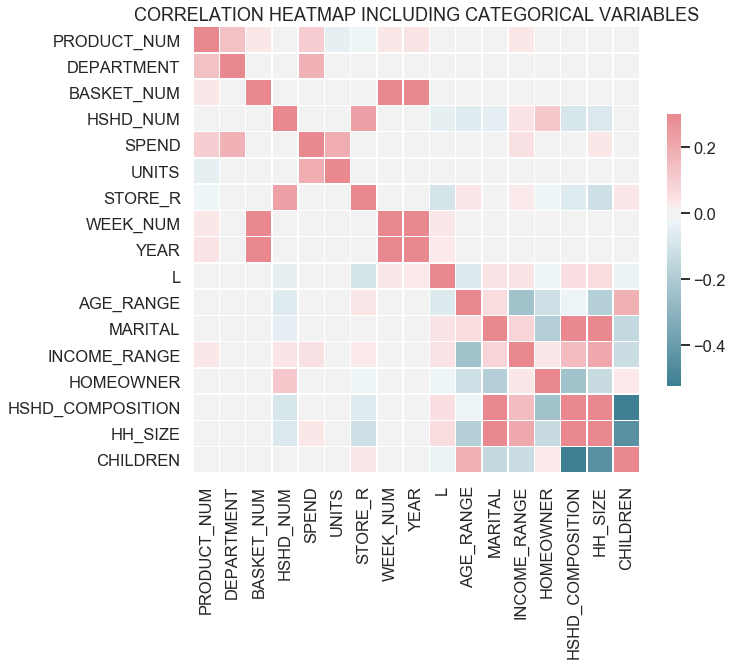

In [30]:
corr_f = data_f.corr()

sns.set()
sns.set_context("talk")
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
corr_heatmap = sns.heatmap(corr_f,  cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
corr_heatmap.set_title('CORRELATION HEATMAP INCLUDING CATEGORICAL VARIABLES')

____________________________________________________________________________________________________________________

#### Analysis of Variables Along Time Plotting Methodology:
- Analyzing the relationship of variables week number (WEEK_NUM)/ year(YEAR), age range (AGE_RANGE,) income range (INCOME_RANGE) with units (UNITS) and spend (SPEND).
- Segmented by year and week number.

#### Analyzing Spend and Units by Income Category

Text(0.5, 0.98, 'SPEND + UNITS BY INCOME')

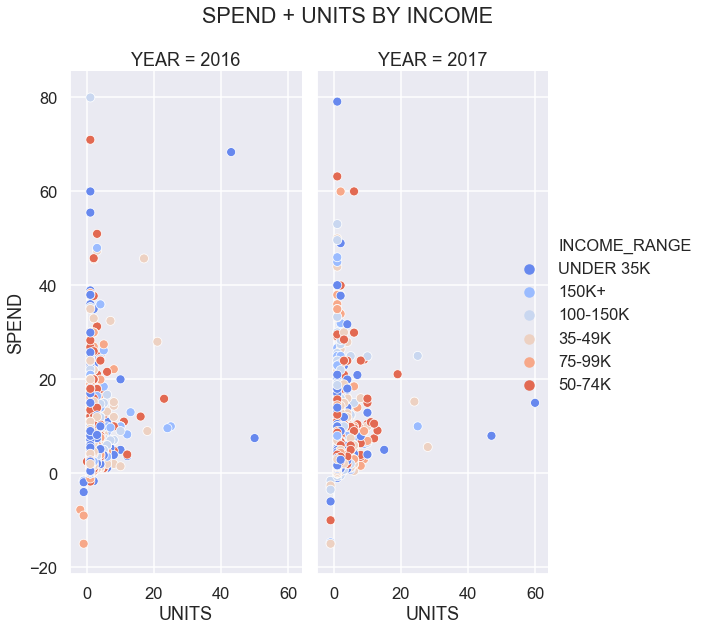

In [31]:
sns.set()
sns.set_context("talk")
axs8 = sns.relplot(data=data,
                  y="SPEND", 
                  x="UNITS",
                  palette = 'coolwarm',
                  hue = "INCOME_RANGE",
                  col = "YEAR")
axs8.fig.set_size_inches(10,10)
axs8.fig.suptitle('SPEND + UNITS BY INCOME')

What does this plot tell us?
- We can see that there does not seem to be a change in spend or unit consumption among shoppers of different income ranges across years.

#### Analyzing Spend and Units by Age Category

Text(0.5, 0.98, 'SPEND + UNITS BY AGE RANGE')

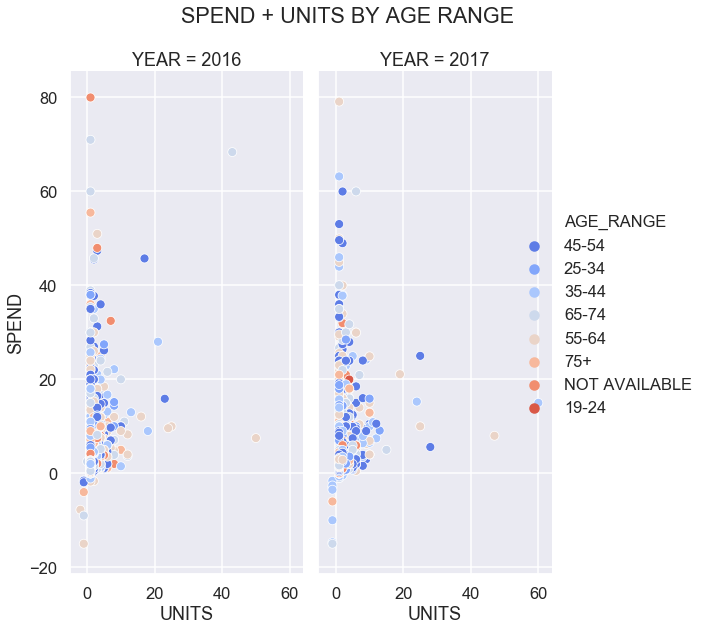

In [32]:
sns.set()
sns.set_context("talk")
axs9 = sns.relplot(data=data, 
                  y="SPEND", 
                  x="UNITS",
                  palette = 'coolwarm',
                  hue = "AGE_RANGE",
                  col = "YEAR")
axs9.fig.set_size_inches(10,10)
axs9.fig.suptitle('SPEND + UNITS BY AGE RANGE')

What does this plot tell us?
- We can see that there does not seem to be a change in spend or unit consumption among shoppers of different age ranges across years.

#### Analyzing Spend and Units by Week and Loyalty Flag

Text(0.5, 0.98, 'SPEND BY WEEK NUMBER AND LOYALTY FLAG')

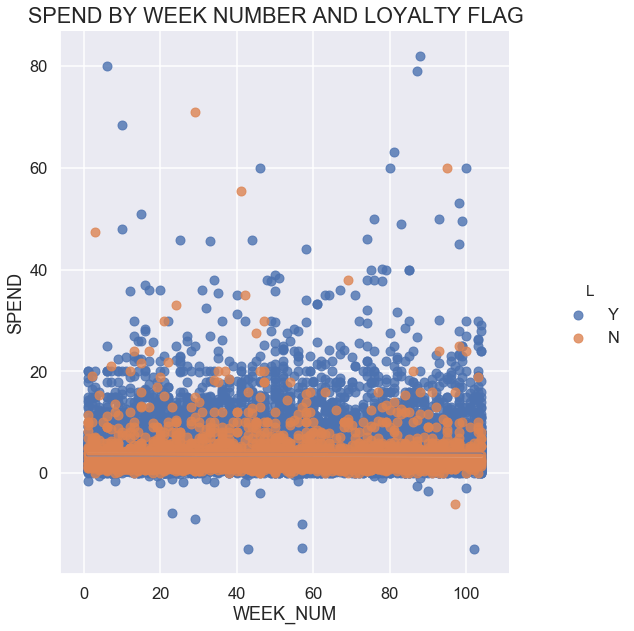

In [33]:
axs10 = sns.lmplot(data=data, 
                  y="SPEND", 
                  x="WEEK_NUM",
                  hue = "L")
axs10.fig.set_size_inches(10,10)
axs10.fig.suptitle('SPEND BY WEEK NUMBER AND LOYALTY FLAG')

What does this plot tell us?
- We can see that shoppers with the loyalty flag tend to spend more money throughout all of the weeks, this relationship doesn't diminish as the weeks continue on.
- We can also see that, as the weeks progress, there doesn't seem to be a change in rate of unit consumption or consumer spend.

____________________________________________________________________________________________________________________

#### Exploratory Regression Modeling

We have seen that the correlations between possible demographic predictor variables for spend and units is not very promising, but below I have run some exploratory regression modeling to determine if any demographic variables can significantly indicate spend of a consumer or units purchased by a consumer.

#### Predicting Spend from Income Range, Homeowner Status, and Loyalty Flag Status 

(multivariate linear regression)

In [34]:
X=data_f[['L','INCOME_RANGE','HOMEOWNER']]
y=data_f['SPEND']
X=sm.add_constant(X)
model_1=sm.OLS(y,X).fit()
predictions_1= model_1.predict(X)
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  SPEND   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     19.87
Date:                Sat, 11 Jul 2020   Prob (F-statistic):           7.37e-13
Time:                        13:37:32   Log-Likelihood:                -61636.
No. Observations:               22290   AIC:                         1.233e+05
Df Residuals:                   22286   BIC:                         1.233e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.2915      0.112     29.306      0.000       3.071       3.512
L               -0.0354      0.091     -0.391      0.696      -0.213       0.142
INCOME_RANGE     0.1276      0.017      7.695      0.000       0.095       0.160
HOMEOWNER        0.0162      0.040      0.406      0.684      -0.062       0.094
==============================================================================
Omnibus:                    23759.820   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2785864.441
Skew:                           5.239   Prob(JB):                         0.00
Kurtosis:                      56.757   Cond. No.                         20.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Regression Results:
- No, we cannot predict sales from a customer's income range, homeowner status, or loyalty flag status.
- However, income range does seem to be a highly significant variable in relation to spend.

#### Predicting Units Purchased from Income Range, Homeowner Status, and Loyalty Flag Status 

(multivariate linear regression)

In [35]:
X=data_f[['L','INCOME_RANGE','HOMEOWNER']]
y=data_f['UNITS']
X=sm.add_constant(X)
model_2=sm.OLS(y,X).fit()
predictions_2= model_2.predict(X)
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  UNITS   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2689
Date:                Sat, 11 Jul 2020   Prob (F-statistic):              0.848
Time:                        13:37:32   Log-Likelihood:                -35046.
No. Observations:               22290   AIC:                         7.010e+04
Df Residuals:                   22286   BIC:                         7.013e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.3144      0.034     38.581      0.000       1.248       1.381
L                0.0178      0.028      0.649      0.517      -0.036       0.072
INCOME_RANGE    -0.0018      0.005     -0.361      0.718      -0.012       0.008
HOMEOWNER       -0.0060      0.012     -0.498      0.618      -0.030       0.018
==============================================================================
Omnibus:                    47806.588   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        424248440.806
Skew:                          18.814   Prob(JB):                         0.00
Kurtosis:                     677.818   Cond. No.                         20.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Regression Results:
- No, we cannot predict units bought from a customer's income range, homeowner status, or loyalty flag status.

____________________________________________________________________________________________________________________

#### Basket Penetration Analysis


1. The percent change in basket penetration for all commodities for the shoppers we are analyzing, from 2016 to 2017, is 163.3%.

#### Percent Change in Basket Penetration from 2016 to 2017 (FULL CHART BELOW)

1. The largest percent change in basket penetration from 2016 to 2017 was for the commodity FLORAL. Basket penetration increased by 352.7%.
2. The second largest change in basket penetration from 2016 to 2017 was for the commodity ACTIVITY. Basket penetration increased by 306.3%.
3. The third largest change in basket penetration from 2016 to 2017 was for the commodity TOBACCO. Basket penetration increased by 275.5%. This is very interesting, as tobacco sales have been dropping for the past few years. This may be an indicator that this sample of 5,000 shoppers in not representative in some ways of the larger average Kroger consumer.

#### Creating Pivot Table for Basket Number and Commodity (Sum, Mean and Count)

In [36]:
bp_piv_1 = data.pivot_table('BASKET_NUM',
                      index = 'COMMODITY',
                      aggfunc=[np.sum,np.mean, 'count'],
                      margins=True)
bp_piv_1[:2]

,sum,mean,count
,BASKET_NUM,BASKET_NUM,BASKET_NUM
COMMODITY,,,
ACTIVITY,853714,426857.000000,2
ALCOHOL,247443697,472220.795802,524


#### Creating Pivot Table for Basket Number and Commodity by Year (Sum, Mean and Count)
- This can help us to determine changes in product popularity from 2016 to 2017

In [37]:
bp_piv_2 = data.pivot_table('BASKET_NUM',
                      index = ['COMMODITY','YEAR'],
                      aggfunc=[np.sum,np.mean, 'count'],
                      margins=True)
bp_piv_2[:3]

sum           mean      count
               BASKET_NUM     BASKET_NUM BASKET_NUM
COMMODITY YEAR                                     
ACTIVITY  2016     168612  168612.000000          1
          2017     685102  685102.000000          1
ALCOHOL   2016   82764770  282473.617747        293

#### Creating a "Group By" Table for Basket Number, Commodity , Year and Loyalty Flag

In [38]:
basket = data[['BASKET_NUM','COMMODITY','YEAR','L']]
basket[:3]

,BASKET_NUM,COMMODITY,YEAR,L
0,663542,PET,2017,Y
1,230835,PET,2016,Y
2,580687,FROZEN FOOD,2017,Y


#### Creating a Data Frame including Basket Number, Commodity and Basket Penetration

In [39]:
basket_g = basket.groupby(['COMMODITY','YEAR'])['BASKET_NUM'].sum() # grouping by commodity and basket number
basket_g = pd.DataFrame(data=basket_g) # creating a dataframe from the group by function
basket_g['COMMODITY'] = basket_g.index # indexing commodity into pliable variable

#### Ensuring that the Sum of the Basket Numbers is Equal to Earlier Calculations

In [40]:
total = basket_g['BASKET_NUM'].sum() #creating the sum of the baskets
print(total)

13153948033


#### Creating a New Variable Called "BASKET_PENETRATION"
- Also called Basket Incidence, this objective relates to what % of shopper baskets your category or product is in. Different categories have different Basket Incidence.

http://shop-ability.com.au/2009/leveraging-retail-objectivesto-drive-growth-basket-penetration-incidence/

In [41]:
basket_g['BASKET_PENETRATION'] = (basket_g['BASKET_NUM']/total)*100 #creating the variable basket penetration with this formula
basket_g[:4]

BASKET_NUM         COMMODITY  BASKET_PENETRATION
COMMODITY YEAR                                                  
ACTIVITY  2016      168612  (ACTIVITY, 2016)            0.001282
          2017      685102  (ACTIVITY, 2017)            0.005208
ALCOHOL   2016    82764770   (ALCOHOL, 2016)            0.629201
          2017   164678927   (ALCOHOL, 2017)            1.251935

#### Ensuring That the Basket Penetration Percentages Equal 100

In [42]:
basket_g['BASKET_PENETRATION'].sum()

100.00000000000001

#### Plotting the Differences in Basket Penetration from 2016 to 2017 for Each Category

Text(0.5, 0, 'BASKET PENETRATION IN PERCENT')

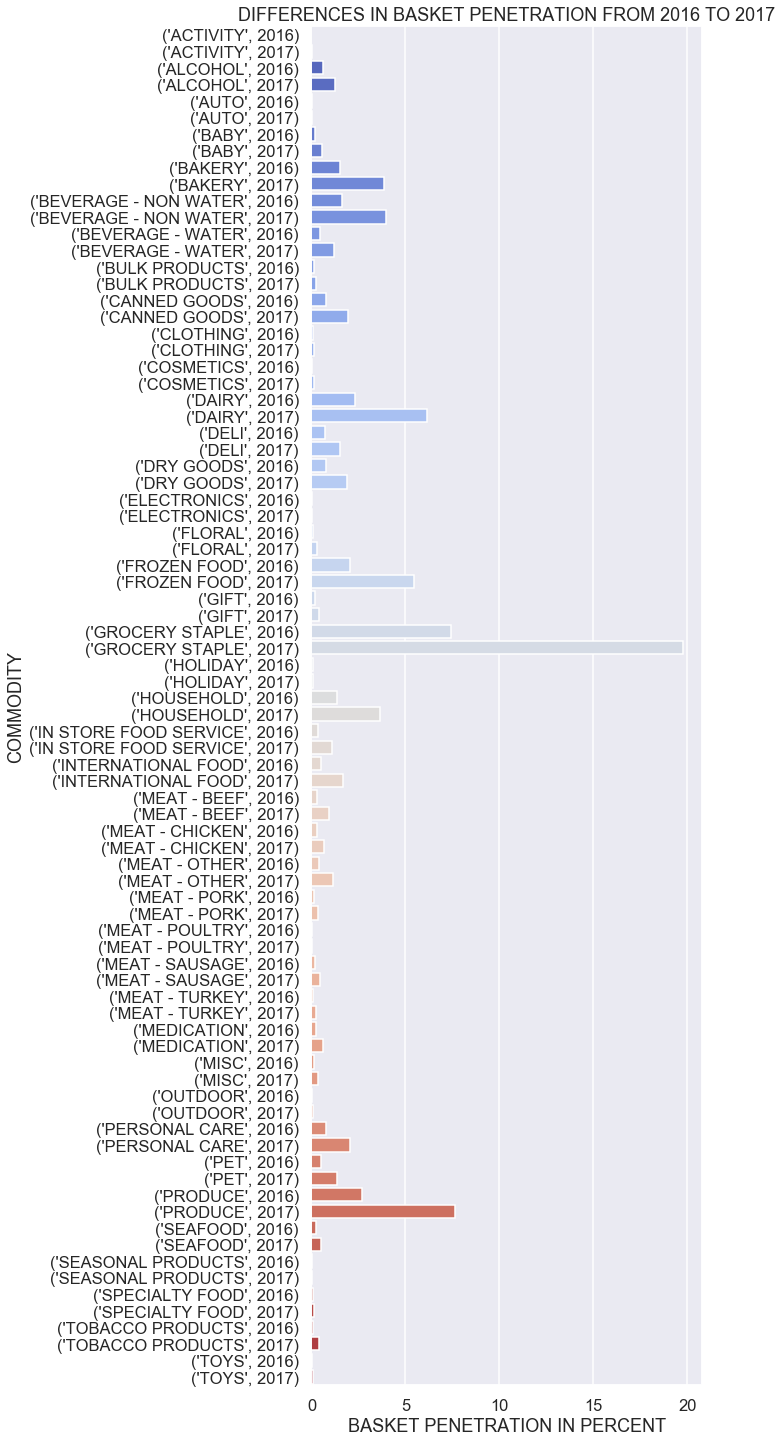

In [43]:
plt.figure(figsize=(7,25))
sns.set()
sns.set_context("talk")
axs11 = sns.barplot(data=basket_g,
           y= 'COMMODITY',
           x= 'BASKET_PENETRATION',
           orient="h",
           palette = 'coolwarm',
           )
axs11.set_title('DIFFERENCES IN BASKET PENETRATION FROM 2016 TO 2017')
axs11.set_xlabel('BASKET PENETRATION IN PERCENT')

#### Percent Change of Basket Penetration for All Commodities

In [44]:
basket_prch = basket.groupby('YEAR')['BASKET_NUM'].sum() # grouping by commodity and basket number
basket_prch

YEAR
2016    3620580394
2017    9533367639
Name: BASKET_NUM, dtype: int64

In [45]:
basket_prch.pct_change()

YEAR
2016         NaN
2017    1.633105
Name: BASKET_NUM, dtype: float64

#### Result
- The percent change in basket penetration for all commodities for the shoppers we are analyzing, from 2016 to 2017, is 163.3%.
- This checks out, because from 2016 to 2017, overall Kroger sales increased by 5.01%.

https://www.macrotrends.net/stocks/charts/KR/kroger/revenue

#### Percent Change of Basket Penetration for Each Commodity

In [99]:
basket_pen = basket_g['BASKET_PENETRATION'] # creating new data set for basket penetration by year
basket_pen = pd.DataFrame(data=basket_pen) # making that data set above a data frame
basket_pen['PERCENT_CHANGE'] = (basket_pen.pct_change())*100 # adding a variable for % change from 2016-2017 each variable
basket_pen[:10] # printing first ten observations

basket_pen_1 = basket_pen.drop(index=2016, level=1) # dropping the unnecessary % change calculations
basket_pen_1['COMMODITY'] = basket_pen_1.index

basket_pen_1[:]

,,BASKET_PENETRATION,PERCENT_CHANGE,COMMODITY
COMMODITY,YEAR,,,
ACTIVITY,2017,0.00520834,306.319,"(ACTIVITY, 2017)"
ALCOHOL,2017,1.25194,98.9723,"(ALCOHOL, 2017)"
AUTO,2017,0.0468629,112.624,"(AUTO, 2017)"
BABY,2017,0.578474,231.9,"(BABY, 2017)"
BAKERY,2017,3.87126,157.292,"(BAKERY, 2017)"
BEVERAGE - NON WATER,2017,3.97979,143.353,"(BEVERAGE - NON WATER, 2017)"
BEVERAGE - WATER,2017,1.18078,154.247,"(BEVERAGE - WATER, 2017)"
BULK PRODUCTS,2017,0.252542,119.77,"(BULK PRODUCTS, 2017)"
CANNED GOODS,2017,1.92413,155.169,"(CANNED GOODS, 2017)"


____________________________________________________________________________________________________________________

#### National vs. Private Kroger Market Share

https://www.kroger.com/b/ourbrands- Private Kroger Brands

In [119]:
n_p = data[['COMMODITY','BRAND_TY']]
n_p

,COMMODITY,BRAND_TY
0,PET,PRIVATE
1,PET,NATIONAL
2,FROZEN FOOD,NATIONAL
3,IN STORE FOOD SERVICE,NATIONAL
4,MEDICATION,NATIONAL
...,...,...
27264,PET,NATIONAL
27265,BABY,NATIONAL
27266,DELI,PRIVATE
27267,DELI,PRIVATE


#### Pivot Table for National vs. Private Kroger Market Share

What we learned:

- By far, these 5,000 consumers purchased more within national brands than within private brands. However, there were 5 commodities that were more popular within private brands than national brands.


1. DAIRY represented 331,566 more purchases for private brands than national.
2. MEAT- BEEF represented 195,124 more purchases for private brands than national.
3. MEAT- CHICKEN represented 105,412 more purchases for private brands than national.
4. MEAT- PORK represented 272,187 more purchases for private brands than national.
5. MEAT- TURKEY represented 81,041 more purchases for private brands than national.


Therefore, it seems as though Kroger private brands for meat products do jointly better than outside brands. This may be because of the ability to adjust prices at peak competitivity for in-house brands, or the product may be superior. This article from CNBC actually notes that meat is the top product to buy at Kroger.

https://www.cnbc.com/2019/06/14/6-groceries-you-should-always-buy-at-kroger.html

In [169]:
n_p_piv = pd.pivot_table(data,'HSHD_NUM',columns='BRAND_TY', index='COMMODITY', aggfunc='sum')
n_p_piv_1 = pd.DataFrame(data=n_p_piv)

n_p_piv_1['DIFFERENCE'] = (n_p_piv_1['NATIONAL'])-(n_p_piv_1['PRIVATE'])

n_p_piv_1[:]

BRAND_TY,NATIONAL,PRIVATE,DIFFERENCE
COMMODITY,,,
ACTIVITY,4369.0,NaN,NaN
ALCOHOL,1286267.0,115299.0,1170968.0
AUTO,45966.0,10955.0,35011.0
BABY,410111.0,148122.0,261989.0
BAKERY,2012394.0,1565825.0,446569.0
BEVERAGE - NON WATER,3275657.0,576450.0,2699207.0
BEVERAGE - WATER,646617.0,502555.0,144062.0
BULK PRODUCTS,129045.0,119267.0,9778.0
CANNED GOODS,1082299.0,751407.0,330892.0


#### National vs. Private Market Share Visualization

Text(0.5, 1.0, 'COMMODITIES BY PRIVATE AND NATIONAL BRANDS')

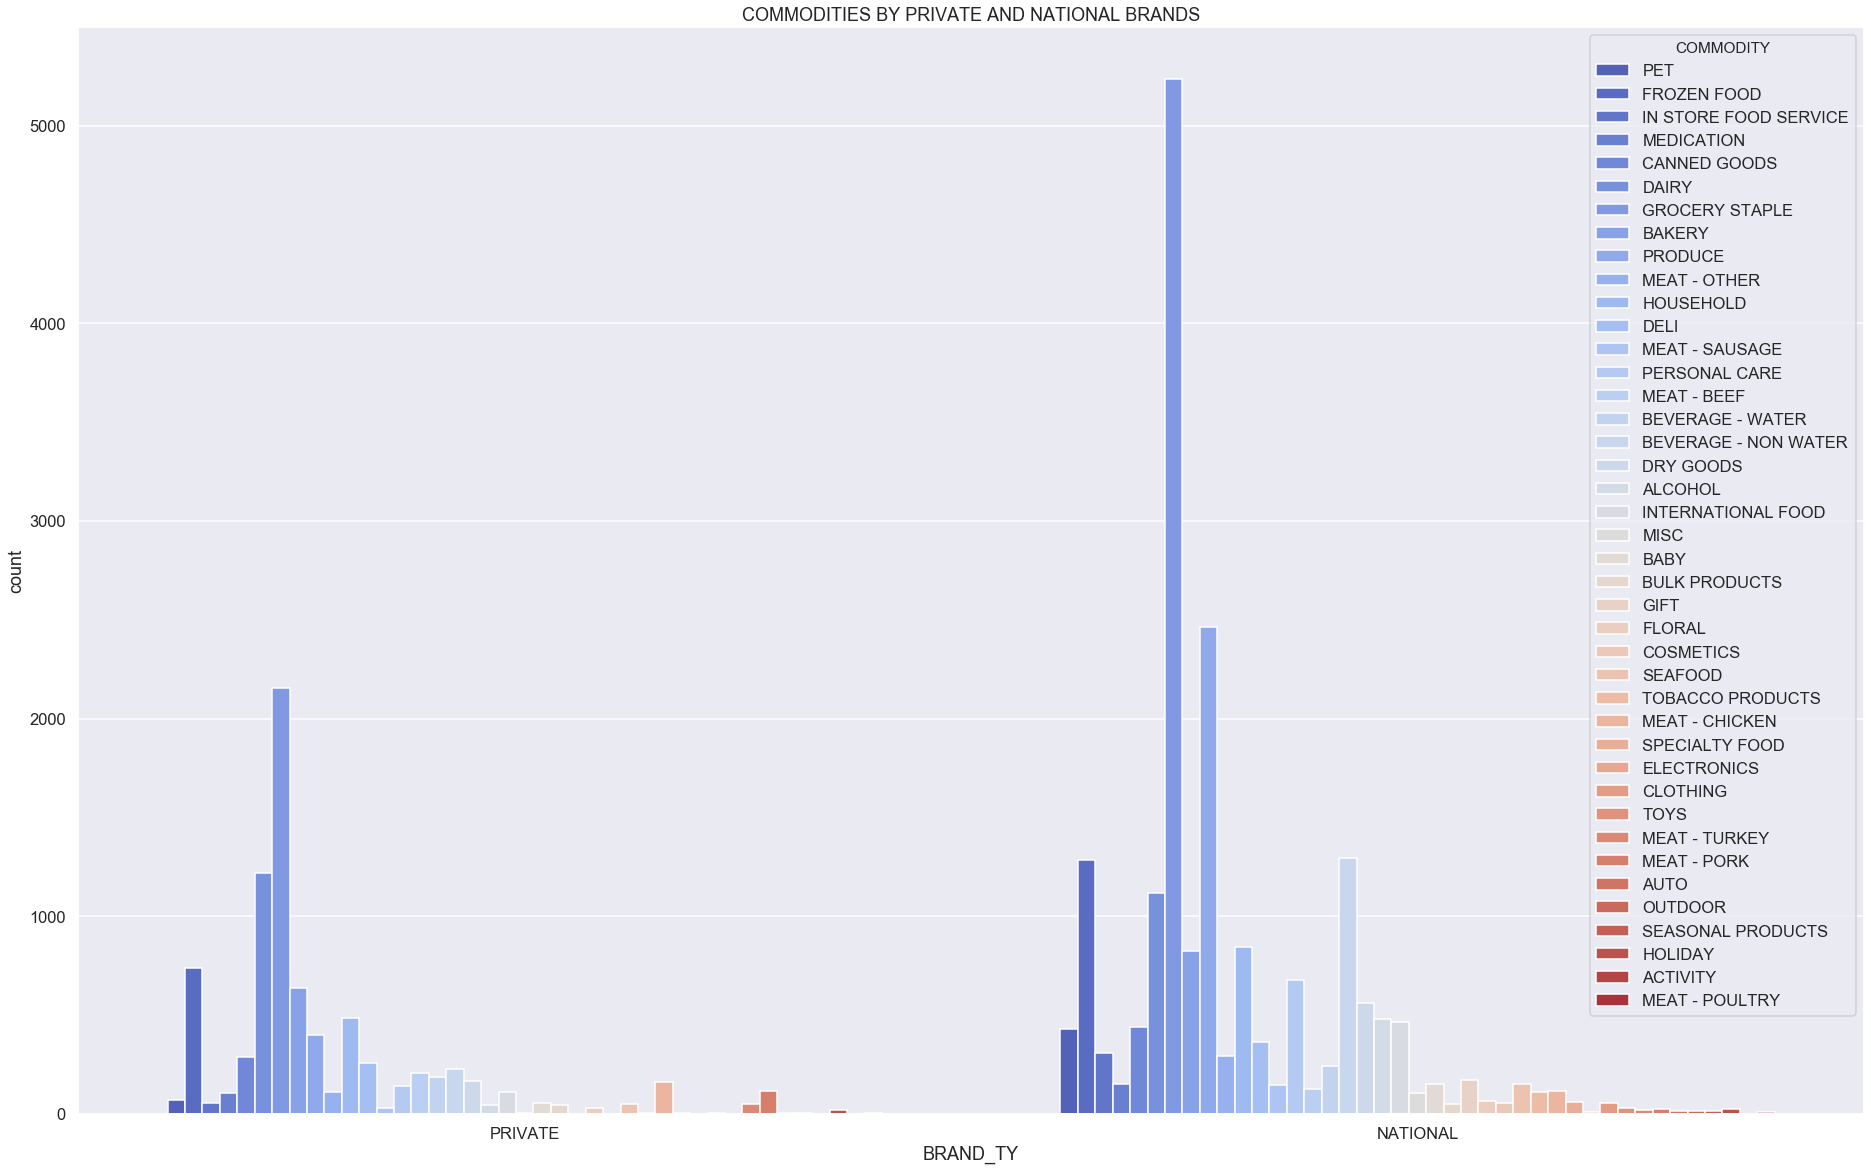

In [145]:
plt.figure(figsize=(32,20))
sns.set()
sns.set_context("talk")

axs12 = sns.countplot(x="BRAND_TY", 
                      hue ="COMMODITY", 
                      orient="h", 
                      palette = 'coolwarm',
                      data=n_p)

axs12.set_title('COMMODITIES BY PRIVATE AND NATIONAL BRANDS')